In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = {}

with open('./data.csv') as f:
    reader = csv.reader(f, delimiter=';')
    next(reader)
    for row in reader:
        if not (row[1] in data):
            data[row[1]] = {}
        if not (row[0] in data[row[1]]):
            data[row[1]][row[0]] = {}
        data[row[1]][row[0]]["min"] = int(row[2])
        data[row[1]][row[0]]["max"] = int(row[3])
        data[row[1]][row[0]]["avg"] = float(row[4])

In [25]:
data

{'1': {'Simple': {'min': 937727, 'max': 1044254, 'avg': 976912.90625},
  'NoOptJitted': {'min': 68194, 'max': 93685, 'avg': 75428.65625},
  'OptJitted': {'min': 2698, 'max': 3731, 'avg': 3139.96875}},
 '2': {'Simple': {'min': 1005235, 'max': 1233822, 'avg': 1055607.0625},
  'NoOptJitted': {'min': 52890, 'max': 59729, 'avg': 55912.71875},
  'OptJitted': {'min': 2656, 'max': 3682, 'avg': 3033.75}},
 '3': {'Simple': {'min': 59203062, 'max': 66779943, 'avg': 60467443.8125},
  'NoOptJitted': {'min': 677080, 'max': 734704, 'avg': 706469.59375},
  'OptJitted': {'min': 216046, 'max': 297761, 'avg': 261891.34375}},
 '4': {'Simple': {'min': 1742617638,
   'max': 2184253502,
   'avg': 1832177648.96875},
  'NoOptJitted': {'min': 28997342, 'max': 30562564, 'avg': 29485182.03125},
  'OptJitted': {'min': 5555225, 'max': 7073034, 'avg': 5881394.65625}}}

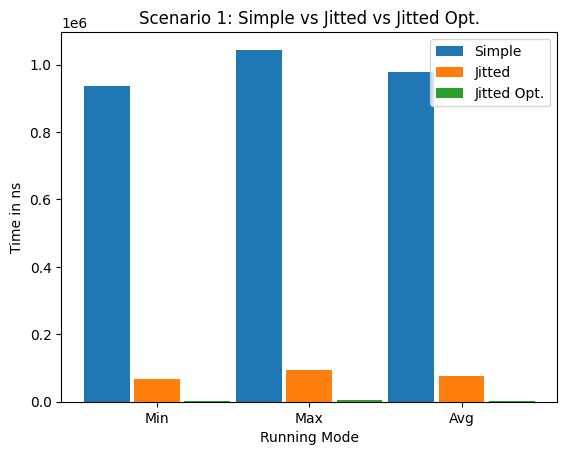

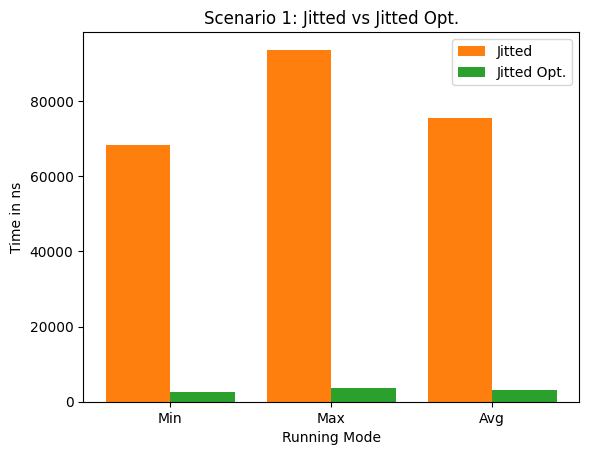

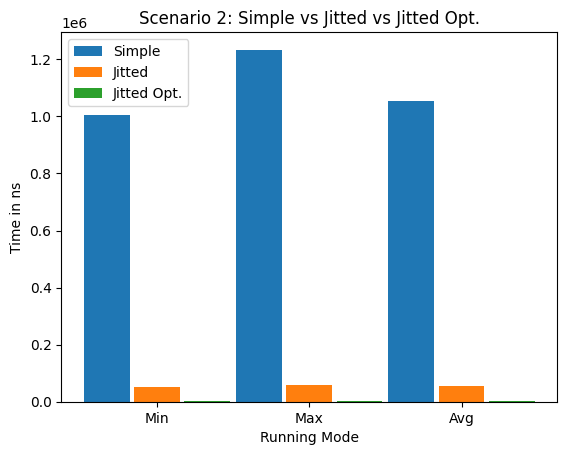

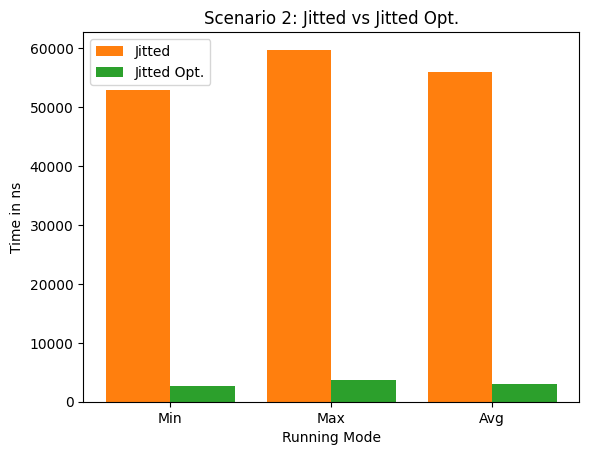

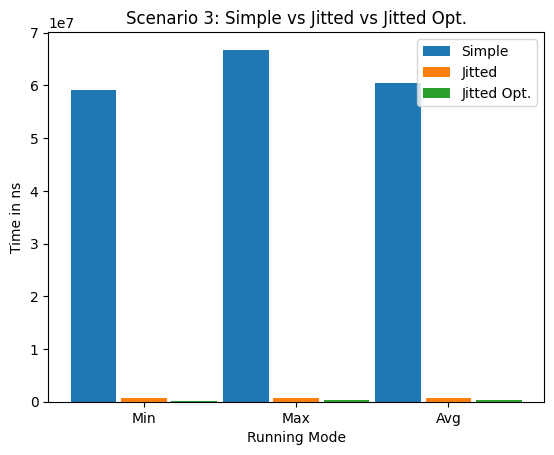

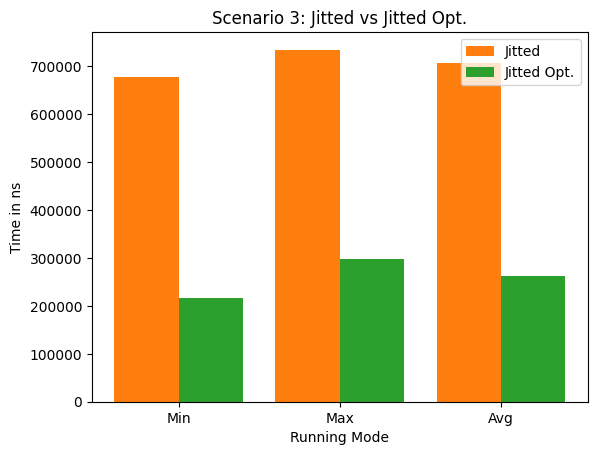

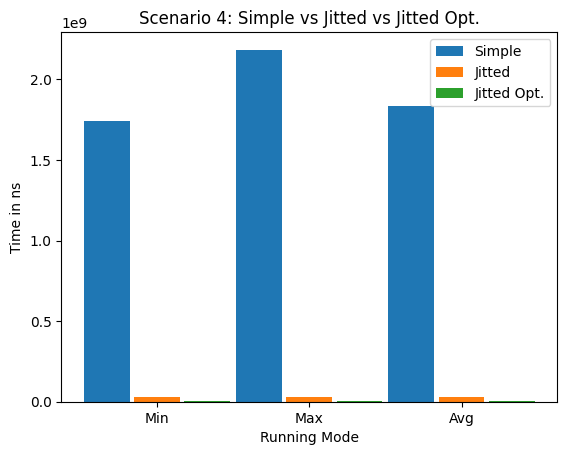

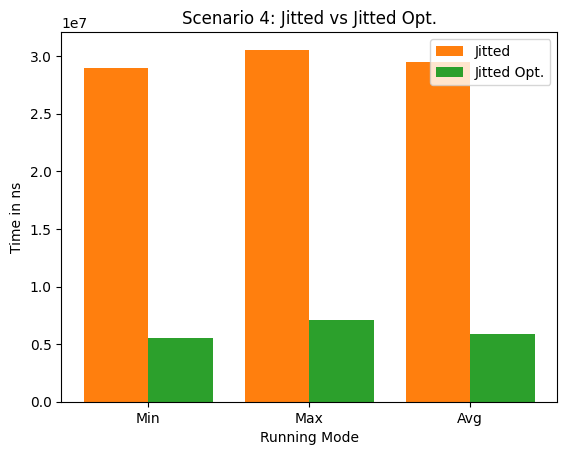

In [46]:
for key in data:
    simple = [data[key]['Simple']['min'], data[key]['Simple']['max'], data[key]['Simple']['avg']]
    jitted = [data[key]['NoOptJitted']['min'], data[key]['NoOptJitted']['max'], data[key]['NoOptJitted']['avg']]
    jitted_opt = [data[key]['OptJitted']['min'], data[key]['OptJitted']['max'], data[key]['OptJitted']['avg']]

    X = ['Min', 'Max', 'Avg']
    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.33, simple, 0.3, label = 'Simple', color='#1f77b4')
    plt.bar(X_axis + 0, jitted, 0.3, label = 'Jitted', color='#ff7f0e')
    plt.bar(X_axis + 0.33, jitted_opt, 0.3, label = 'Jitted Opt.', color='#2ca02c')

    plt.xticks(X_axis, X)
    plt.xlabel("Running Mode")
    plt.ylabel("Time in ns")
    plt.title(f"Scenario {key}: Simple vs Jitted vs Jitted Opt.")
    plt.legend()
    plt.show()

    plt.bar(X_axis - 0.2, jitted, 0.4, label = 'Jitted', color='#ff7f0e')
    plt.bar(X_axis + 0.2, jitted_opt, 0.4, label = 'Jitted Opt.', color='#2ca02c')

    plt.xticks(X_axis, X)
    plt.xlabel("Running Mode")
    plt.ylabel("Time in ns")
    plt.title(f"Scenario {key}: Jitted vs Jitted Opt.")
    plt.legend()
    plt.show()